In [2]:
import tkinter as tk
from tkinter import messagebox, ttk, filedialog
import backend
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np

3.8.2 (default, Mar 25 2020, 11:22:43) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Step 1-1: File loaded successfully: Data/USER_LOG.csv
Step 1-1: File loaded successfully: Data/ACTIVITY_LOG.csv
Step 1-1: File loaded successfully: Data/COMPONENT_CODES.csv
Step 1: All datasets loaded and validated successfully (RENAME).
Datasets are ready for the next step.
Step 2-1: Primary keys added successfully.
Step 2-2: Month column extracted successfully.
Step 2-3: Data cleaned successfully in Pandas(REMOVE).
Step 2-4: Datasets merged successfully in Pandas(MERGE).
Step 2-5: Merged data saved successfully in JSON format as 'merged_data.json'.
Step 2-6: Data reshaped for statistics and correlation, and saved to JSON files(RESHAPE)(COUNT).
Step 2 Complete: Preprocessing, merging, and JSON saving completed successfully.
Step 3-1: Data loaded successfully from 'monthly_statistics.json'.
Step 3-1: Data loaded successfully from 'semester_statistics.json'.
Step 3-1: Data loaded successfully from 'correlatio

Step 1-1: File loaded successfully: /Users/user/Library/CloudStorage/OneDrive-UniversityofYork/04_Advanced Programming 28th October 2024/02_Summative/2 Implementation/Data/USER_LOG.csv
Step 1-1: File loaded successfully: /Users/user/Library/CloudStorage/OneDrive-UniversityofYork/04_Advanced Programming 28th October 2024/02_Summative/2 Implementation/Data/ACTIVITY_LOG.csv
Step 1-1: File loaded successfully: /Users/user/Library/CloudStorage/OneDrive-UniversityofYork/04_Advanced Programming 28th October 2024/02_Summative/2 Implementation/Data/COMPONENT_CODES.csv
Step 1: All datasets loaded and validated successfully (RENAME).
Step 2-1: Primary keys added successfully.
Step 2-2: Month column extracted successfully.
Step 2-3: Data cleaned successfully in Pandas(REMOVE).
Step 2-4: Datasets merged successfully in Pandas(MERGE).
Step 2-5: Merged data saved successfully in JSON format as 'merged_data.json'.
Step 2-6: Data reshaped for statistics and correlation, and saved to JSON files(RESHAPE)

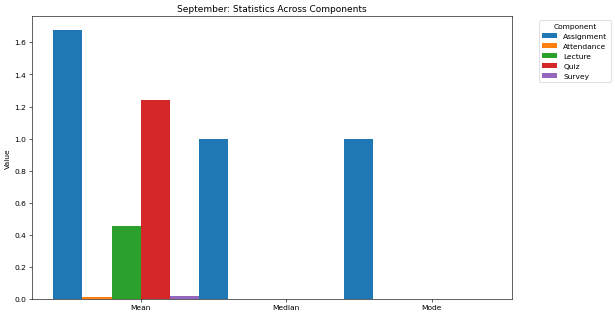

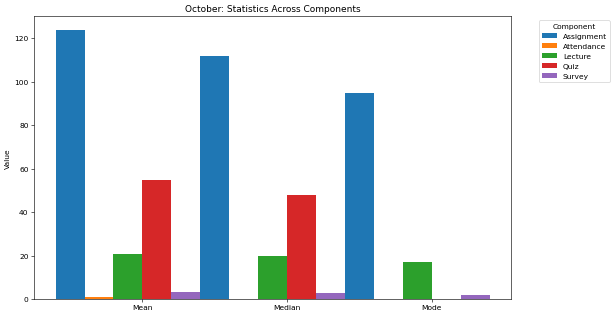

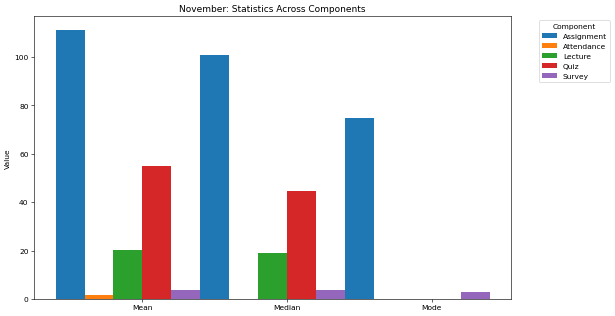

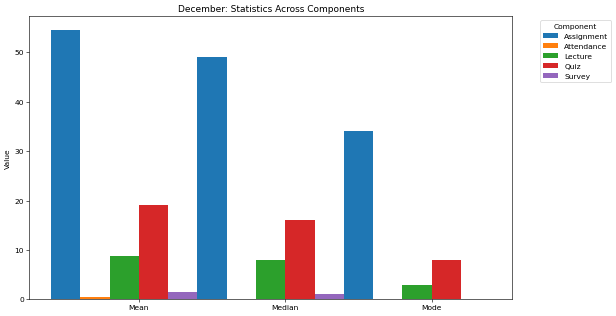

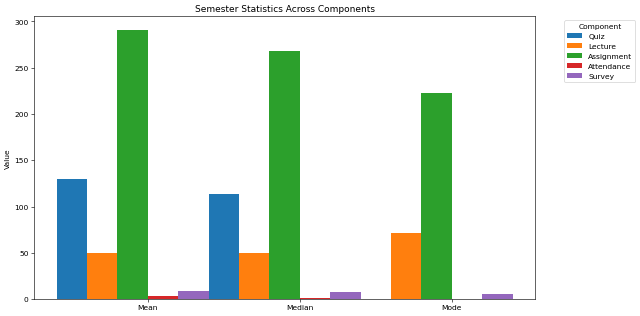

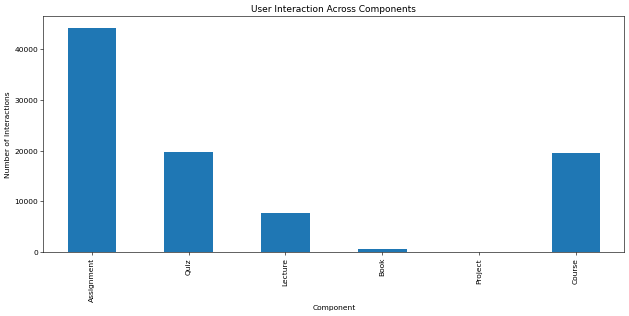

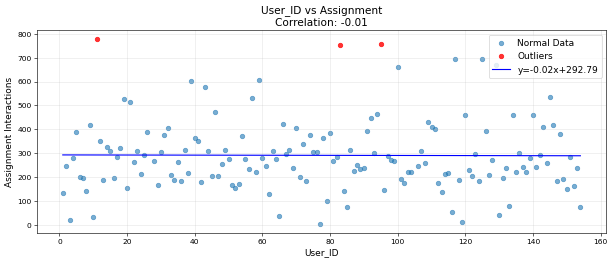

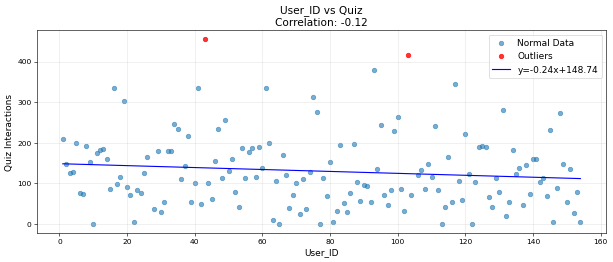

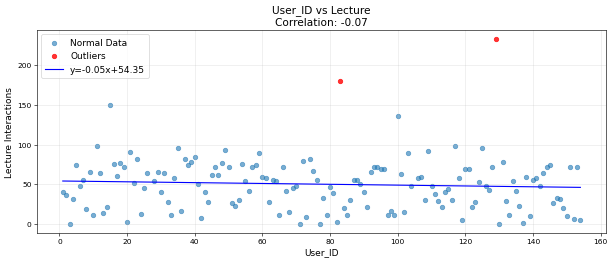

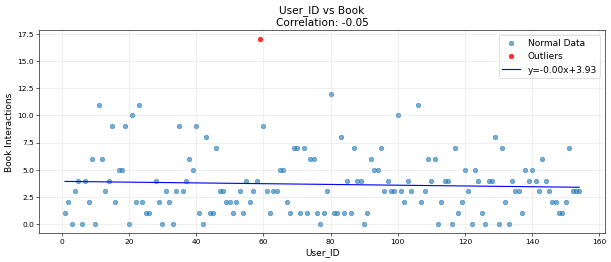

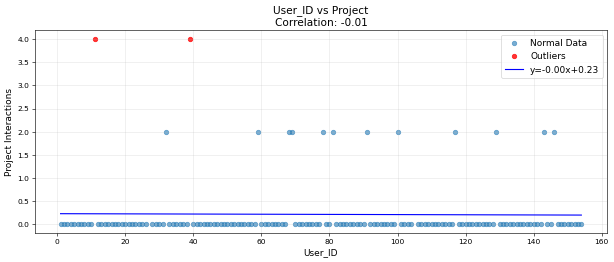

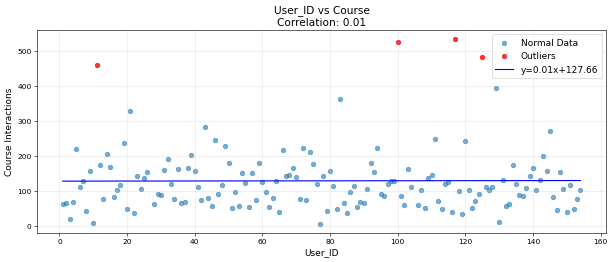

In [6]:
def create_gui():
    """
    Create a GUI application to handle dataset processing and analysis.
    Includes improvements based on feedback for better clarity and user experience.
    """

    # Create the main window
    root = tk.Tk()
    root.title("Student Engagement Analysis System")
    root.geometry("1200x1200")  # Adjusted size for better layout
    root.configure(bg="#e6f7ff")  # Set background color

    # Add title label at the top
    title_label = tk.Label(
        root,
        text="🌟 Student Engagement Analysis System 🌟",
        bg="#e6f7ff",
        fg="#004d99",
        font=("Arial", 24, "bold"),
    )
    title_label.pack(pady=10)
    
    # Add a note below the title
    note_label = tk.Label(
        root,
        text="Note: The CSVs must be loaded in order (USER_LOG.csv, ACTIVITY_LOG.csv, and COMPONENT_CODES.csv)",
        bg="#e6f7ff",
        fg="#ff3333",  # Red text for emphasis
        font=("Arial", 18, "italic"),
        wraplength=800,  # Wrap text to fit in the window
        justify="center",  # Center align the text
    )
    note_label.pack(pady=5)  # Add some padding below the note

    # Left-hand side: Frame for step buttons
    button_frame = tk.LabelFrame(
        root, text="🔧 Steps", bg="#e6f7ff", font=("Arial", 16, "bold")
    )
    button_frame.place(x=20, y=120, width=300, height=600)

    # Right-hand side: Frame for output
    feedback_frame = tk.LabelFrame(
        root, text="📋 Feedback", bg="#f0f8ff", font=("Arial", 16, "bold")
    )
    feedback_frame.place(x=350, y=120, width=820, height=350)

    # Add feedback label inside the output frame for dynamic messages
    feedback_label = tk.Label(
        feedback_frame,
        text="Welcome! 😊",
        bg="#f0f8ff",
        fg="#004d99",
        font=("Arial", 14, "italic"),
        anchor="w",  # Align text to the left
    )
    feedback_label.pack(fill="x", padx=5, pady=5)

    # Add a text area for displaying detailed outputs
    output_text = tk.Text(
        feedback_label, wrap="word", bg="#ffffff", fg="#003366", font=("Arial", 14)
    )
    output_text.pack(expand=True, fill="both", padx=5, pady=5)

    # Add a frame for graphs below the output frame
    graph_frame = tk.LabelFrame(
        root, text="📊 OUTPUT STATISTICS and CORRELATION", bg="#ffffff", font=("Arial", 16, "bold")
    )
    graph_frame.place(x=350, y=240, width=820, height=480)

    # Helper functions for feedback and output updates
    def update_feedback(message, success=True):
        """
        Update the feedback label with a message.
        Parameters:
        - message: The feedback text to display.
        - success: Boolean to indicate positive (green) or negative (red) feedback.
        """
        feedback_label.config(text=message, fg="green" if success else "red")

    def update_output(message):
        """
        Update the output text area with the provided message.
        """
        output_text.delete(1.0, tk.END)  # Clear existing text
        output_text.insert(tk.END, message)  # Insert new message
        
    # Make scrollable graph frame on GUI
    def make_scrollable_graph_frame():
        """
        Create a scrollable frame for graphs inside a Canvas widget.
        """
        # Create a canvas and vertical scrollbar
        canvas = tk.Canvas(root, bg="#ffffff")  # Canvas for scrollable content
        scrollbar = tk.Scrollbar(root, orient="vertical", command=canvas.yview)
        scrollable_frame = tk.Frame(canvas, bg="#ffffff")

        # Configure scrollable frame
        scrollable_frame.bind(
            "<Configure>",
            lambda e: canvas.configure(scrollregion=canvas.bbox("all"))  # Dynamically adjust scrolling
        )

        # Add the frame to the canvas
        canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)

        # Place the canvas and scrollbar in the window
        canvas.place(x=350, y=260, width=820, height=480)  # Updated placement
        scrollbar.place(x=1170, y=260, height=480)

        return scrollable_frame
    
    # Create scrollable graph frame
    graph_frame = make_scrollable_graph_frame()
    
    def plot_graph_in_gui(figs):
        """
        Embed multiple matplotlib figures into the scrollable graph frame.
        Parameters:
        - figs: List of matplotlib figures to embed.
        """
        # Clear the graph frame first
        for widget in graph_frame.winfo_children():
            widget.destroy()

        # Add each figure as a new canvas in the frame
        for i, fig in enumerate(figs):
            sub_frame = tk.Frame(graph_frame, bg="#ffffff")
            sub_frame.pack(side="top", fill="both", expand=True, pady=10)

            canvas = FigureCanvasTkAgg(fig, sub_frame)
            canvas.draw()
            canvas.get_tk_widget().pack(fill="both", expand=True)
            
    # Global variables for datasets
    global df_user, df_activity, df_component
    global reshaped_df1, reshaped_df2, interaction_counts_df

    # Step 1: Load Initial Datasets
    def load_datasets():
        """
        Step 1: Load initial datasets via file dialog in a specific order.
        The user is guided to select USER_LOG, ACTIVITY_LOG, and COMPONENT_CODES CSV files in order.
        """
        try:
            update_feedback("Step 1: Please select the USER_LOG CSV file.")
            user_log_path = filedialog.askopenfilename(title="Select USER_LOG CSV File")

            if not user_log_path:
                raise ValueError("USER_LOG CSV file is required to proceed.")

            update_feedback("Step 1: USER_LOG CSV file selected successfully. ✅ Now, select the ACTIVITY_LOG CSV file.")
            activity_log_path = filedialog.askopenfilename(title="Select ACTIVITY_LOG CSV File")

            if not activity_log_path:
                raise ValueError("ACTIVITY_LOG CSV file is required to proceed.")

            update_feedback("Step 1: ACTIVITY_LOG CSV file selected successfully. ✅ Finally, select the COMPONENT_CODES CSV file.")
            component_codes_path = filedialog.askopenfilename(title="Select COMPONENT_CODES CSV File")

            if not component_codes_path:
                raise ValueError("COMPONENT_CODES CSV file is required to proceed.")

            # Load datasets using backend
            global df_user, df_activity, df_component
            df_user, df_activity, df_component = backend.load_and_validate_datasets(
                user_log_path, activity_log_path, component_codes_path
            )

            # Check if all datasets are loaded successfully
            if df_user is None or df_activity is None or df_component is None:
                raise ValueError("Failed to load one or more datasets. Please check the file format and try again.")

            update_feedback("Step 1 Complete: All datasets loaded successfully in order! ✅", success=True)
            update_output("Datasets loaded and validated. Ready for preprocessing and merging.")
            enable_button(step2_button)
            mark_completed(step1_button)

        except Exception as e:
            update_feedback(f"Error in Step 1: {str(e)}", success=False)

    # Step 2: Preprocess
    def preprocess_and_merge():
        """
        Step 2: Preprocess and merge datasets.
        Includes Steps 2-1 to 2-7.
        """
        try:
            update_feedback("Preprocessing and merging datasets... Please wait.")

            # Call the backend function to preprocess and merge
            backend.preprocess_and_merge()

            # Provide feedback to the user
            update_feedback("Step 2 Complete: Datasets preprocessed and merged successfully! ✅", success=True)
            update_output("Preprocessing and merging completed.\nData is stored in JSON. Ready for analysis.")
            enable_button(step3_button)
            mark_completed(step2_button)

        except Exception as e:
            update_feedback(f"Error in Step 2: {str(e)}", success=False)

    # Step 3: Load the Processed Data
    def load_processed_data():
        """
        Step 3: Load processed data.
        Includes Step 3-1 (retrieve data from JSON).
        """
        try:
            update_feedback("Loading processed datasets... Please wait.")
            global reshaped_df1, reshaped_df2, interaction_counts_df

            reshaped_df1 = backend.load_data_from_json("monthly_statistics.json")
            reshaped_df2 = backend.load_data_from_json("semester_statistics.json")
            interaction_counts_df = backend.load_data_from_json("correlation_data.json")

            update_feedback("Step 3 Complete: Processed data loaded successfully! ✅", success=True)
            update_output("Processed data loaded successfully.\nReady for analysis.")
            enable_button(step4_button)
            mark_completed(step3_button)
        except Exception as e:
            update_feedback(f"Error in Step 3: {str(e)}", success=False)
            
    # Step 4: Analyse and Visualise
    def conduct_analysis():
        """
        Step 4: Perform statistical analysis and visualization.
        Includes Steps 4-1 to 4-4.
        """
        try:
            update_feedback("Conducting analysis... Please wait.")
            all_graphs = []  # Store all figures to be displayed

            # Step 4-1: Monthly Statistics
            monthly_statistics_df = backend.calculate_monthly_statistics(reshaped_df1)
            months = monthly_statistics_df['Month'].unique()
            statistics = ['Mean', 'Median', 'Mode']
            bar_width = 0.2

            for month in months:
                fig, ax = plt.subplots(figsize=(10, 6))
                month_data = monthly_statistics_df[monthly_statistics_df['Month'] == month]

                x = np.arange(len(statistics))  # x-axis positions
                for i, component in enumerate(month_data['Component'].unique()):
                    stats = month_data[month_data['Component'] == component][statistics].values.flatten()
                    ax.bar(x + i * bar_width, stats, bar_width, label=component)

                ax.set_title(f"{month}: Statistics Across Components")
                ax.set_xticks(x + bar_width * (len(month_data['Component'].unique()) / 2))
                ax.set_xticklabels(statistics)
                ax.set_ylabel("Value")
                ax.legend(title="Component", bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()

                # Add the figure to the all_graphs list
                all_graphs.append(fig)

            # Step 4-2: Semester Statistics
            semester_statistics_df = backend.calculate_semester_statistics(reshaped_df2)
            statistics = ['Mean', 'Median', 'Mode']
            x = np.arange(len(statistics))
            bar_width = 0.2

            fig, ax = plt.subplots(figsize=(12, 6))
            for i, component in enumerate(semester_statistics_df['Component'].unique()):
                stats = semester_statistics_df[semester_statistics_df['Component'] == component][statistics].values.flatten()
                ax.bar(x + i * bar_width, stats, bar_width, label=component)

            ax.set_title("Semester Statistics Across Components")
            ax.set_xticks(x + bar_width * (len(semester_statistics_df['Component'].unique()) / 2))
            ax.set_xticklabels(statistics)
            ax.set_ylabel("Value")
            ax.legend(title="Component", bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()

            # Add the figure to the all_graphs list
            all_graphs.append(fig)

            # Step 4-3: Interaction histogram (kept unchanged)
            fig1 = plt.figure(figsize=(10, 6))
            ax1 = fig1.add_subplot(111)
            components_interaction = ['Assignment', 'Quiz', 'Lecture', 'Book', 'Project', 'Course']
            available_components = [col for col in components_interaction if col in interaction_counts_df.columns]
            interaction_counts_df[available_components].sum().plot(
                kind="bar",
                ax=ax1,
                title="User Interaction Across Components",
                xlabel="Component",
                ylabel="Number of Interactions",
            )
            plt.tight_layout()
            all_graphs.append(fig1)

            # Step 4-4: Scatter plots with regression lines (kept unchanged)
            for component in available_components:
                x = interaction_counts_df["User_ID"]
                y = interaction_counts_df[component]

                correlation = backend.calculate_correlation(x, y)
                coeffs = backend.calculate_regression_coefficients(x, y)
                outliers = backend.identify_outliers(y)

                fig, ax = plt.subplots(figsize=(8, 5))
                ax.scatter(x[~outliers], y[~outliers], alpha=0.6, label="Normal Data")
                ax.scatter(x[outliers], y[outliers], color="red", alpha=0.8, label="Outliers")
                regression_line = np.poly1d(coeffs)
                ax.plot(x, regression_line(x), color="blue", label=f"y={coeffs[0]:.2f}x+{coeffs[1]:.2f}")

                ax.set_title(f"User_ID vs {component}\nCorrelation: {correlation:.2f}", fontsize=14)
                ax.set_xlabel("User_ID", fontsize=12)
                ax.set_ylabel(f"{component} Interactions", fontsize=12)
                ax.legend(fontsize=12)
                ax.grid(True, alpha=0.3)
                plt.tight_layout()
                all_graphs.append(fig)

            # Embed all graphs into the GUI
            plot_graph_in_gui(all_graphs)
            update_feedback("Step 4 Complete: All graphs displayed successfully! ✅", success=True)
            mark_completed(step4_button)

        except Exception as e:
            update_feedback(f"Error in Step 4: {str(e)}", success=False)
  
    def enable_button(button):
        """
        Enable a button and visually indicate it is active.
        Parameters:
        - button: The button widget to enable.
        """
        button.config(state="normal", bg="#a3d3ff")

    def mark_completed(button):
        """
        Mark a button as completed (disabled and visually grayed out).
        Parameters:
        - button: The button widget to mark as completed.
        """
        button.config(bg="#d3d3d3", fg="#6c6c6c", state="disabled", text="✅ " + button.cget("text"))

    # Define step buttons inside the button frame

    step1_button = tk.Button(
    button_frame,
    text="Step 1: Load Datasets",
    command=load_datasets,  # Updated to use the new load_datasets function
    width=25,
    height=2,
    bg="#cce7ff",
    font=("Arial", 14, "bold"),
    )
    step1_button.pack(pady=10)

    step2_button = tk.Button(
        button_frame,
        text="Step 2: Preprocess and Merge",
        command=preprocess_and_merge,  # Function for Step 2
        state="disabled",  # Initially disabled
        width=25,
        height=2,
        bg="#cce7ff",
        font=("Arial", 14, "bold"),
    )
    step2_button.pack(pady=10)

    step3_button = tk.Button(
        button_frame,
        text="Step 3: Load Processed Data",
        command=load_processed_data,  # Function for Step 3
        state="disabled",  # Initially disabled
        width=25,
        height=2,
        bg="#cce7ff",
        font=("Arial", 14, "bold"),
    )
    step3_button.pack(pady=10)

    step4_button = tk.Button(
        button_frame,
        text="Step 4: Conduct Analysis",
        command=conduct_analysis,  # Function for Step 4
        state="disabled",  # Initially disabled
        width=25,
        height=2,
        bg="#cce7ff",
        font=("Arial", 14, "bold"),
    )
    step4_button.pack(pady=10)

    # Run the Tkinter main loop
    root.mainloop()

if __name__ == "__main__":
    create_gui()

In [ ]:

    
    def load_datasets():
        """
        Step 1: Load initial datasets via file dialog in a specific order.
        The user is guided to select USER_LOG, ACTIVITY_LOG, and COMPONENT_CODES CSV files in order.
        """
        try:
            update_feedback("Step 1: Please select the USER_LOG CSV file.")
            user_log_path = filedialog.askopenfilename(title="Select USER_LOG CSV File")

            if not user_log_path:
                raise ValueError("USER_LOG CSV file is required to proceed.")

            update_feedback("Step 1: USER_LOG CSV file selected successfully. ✅ Now, select the ACTIVITY_LOG CSV file.")
            activity_log_path = filedialog.askopenfilename(title="Select ACTIVITY_LOG CSV File")

            if not activity_log_path:
                raise ValueError("ACTIVITY_LOG CSV file is required to proceed.")

            update_feedback("Step 1: ACTIVITY_LOG CSV file selected successfully. ✅ Finally, select the COMPONENT_CODES CSV file.")
            component_codes_path = filedialog.askopenfilename(title="Select COMPONENT_CODES CSV File")

            if not component_codes_path:
                raise ValueError("COMPONENT_CODES CSV file is required to proceed.")

            # Load datasets using backend
            global df_user, df_activity, df_component
            df_user, df_activity, df_component = backend.load_and_validate_datasets(
                user_log_path, activity_log_path, component_codes_path
            )

            # Check if all datasets are loaded successfully
            if df_user is None or df_activity is None or df_component is None:
                raise ValueError("Failed to load one or more datasets. Please check the file format and try again.")

            update_feedback("Step 1 Complete: All datasets loaded successfully in order! ✅", success=True)
            update_output("Datasets loaded and validated. Ready for preprocessing and merging.")
            enable_button(step2_button)
            mark_completed(step1_button)

        except Exception as e:
            update_feedback(f"Error in Step 1: {str(e)}", success=False)

# EOF